# 

In [1]:
from __future__ import print_function
from __future__ import division

import numpy as np
import argparse
import random
import shutil
import time
import warnings
import os
import sys
import copy

import torch
import torch.nn as nn

import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.distributed as dist
import torch.optim as optim

import torch.multiprocessing as mp
import torch.utils.data
import torch.utils.data.distributed

import torchvision
from torchvision import datasets, models, transforms

import matplotlib.pyplot as plt

print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  0.4.1
Torchvision Version:  0.2.2


No handles with labels found to put in legend.


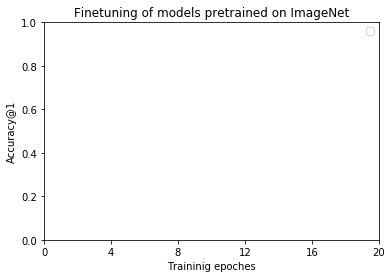

In [2]:
# 12h runing
# regex
#https://stackoverflow.com/questions/32680030/match-text-between-two-strings-with-regular-expression
# read filename in a directory
#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
# read txt line by line
#https://stackoverflow.com/questions/3277503/how-to-read-a-file-line-by-line-into-a-list

scorefilepath='../DL_Final_Project_Models'

net_score_dict={}

for scorefilename in os.listdir(scorefilepath):
    try:
        filenetname=re.search(r'190421_raw_(.*?).pt_val_acc', scorefilename).group(1)
        #print(filenetname)
        with open(scorefilepath+'/'+scorefilename) as f:
            content = f.readlines()
            
        #print(content)
        net_score_dict[filenetname]= [float(re.search(r"tensor\((.*?), device=\'cuda\:0\', dtype=torch.float64\)", s).group(1)) for s in content] 
        #tensor(0.4176, device='cuda:0', dtype=torch.float64)
    except:
        pass
    
k_to_m_dict={'vgg':'vgg11_bn','squeezenet':'squeezenet1_0','resnet':'resnet18','alexnet':'alexnet','densenet':'densenet121','inception':'inception_v3'}

for k in net_score_dict.keys():
    plt.plot(range(1,1+len(net_score_dict[k])),net_score_dict[k],label=k_to_m_dict[k])
plt.ylabel('Accuracy@1')
plt.xticks(np.arange(0, 24, 4.0))
plt.xlabel('Traininig epoches')
plt.title('Finetuning of models pretrained on ImageNet')
plt.legend()
plt.show()

vgg_fcadj
vgg_alladj


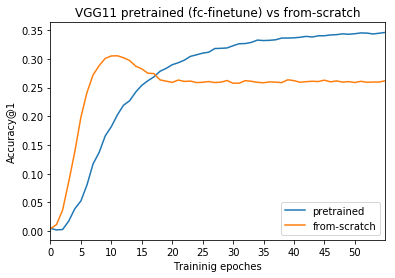

In [3]:
import re
# 12h runing
# regex
#https://stackoverflow.com/questions/32680030/match-text-between-two-strings-with-regular-expression
# read filename in a directory
#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
# read txt line by line
#https://stackoverflow.com/questions/3277503/how-to-read-a-file-line-by-line-into-a-list

scorefilepath='/scratch/by783/DL_Final_models/'

net_score_dict={}

for scorefilename in os.listdir(scorefilepath):
    try:
        filenetname=re.search(r'190422_(.*?).pt_val_acc', scorefilename).group(1)
        print(filenetname)
        with open(scorefilepath+'/'+scorefilename) as f:
            content = f.readlines()
            
        #print(content)
        net_score_dict[filenetname]= [float(re.search(r"tensor\((.*?), device=\'cuda\:0\', dtype=torch.float64\)", s).group(1)) for s in content] 
        #tensor(0.4176, device='cuda:0', dtype=torch.float64)
    except:
        pass
    
#k_to_m_dict={'vgg':'vgg11_bn','squeezenet':'squeezenet1_0','resnet':'resnet18','alexnet':'alexnet','densenet':'densenet121','inception':'inception_v3'}

k_to_m_dict={'vgg_fcadj':'pretrained','vgg_alladj':'from-scratch'}

for k in net_score_dict.keys():
    plt.plot(range(len(net_score_dict[k])),net_score_dict[k],label=k_to_m_dict[k])#_to_m_dict[k])
plt.ylabel('Accuracy@1')
plt.xticks(np.arange(0, 55, 5.0))
plt.xlim([0,55])
plt.xlabel('Traininig epoches')
plt.title('VGG11 pretrained (fc-finetune) vs from-scratch')
plt.legend()
plt.show()

In [4]:
scorefilepath='/scratch/by783/DL_Final_models/'
enpretrained_filename='190425_raw_vggae_en_pretrained_s.pt_loss'
fromscratch_filename='190425_raw_vggae_fromscratch_s.pt_loss'


fromscratch_unlabeled=[]
fromscratch_labeled=[]
enpretrained_unlabeled=[]
enpretrained_labeled=[]

loss_dict={}

for scorefilename in os.listdir(scorefilepath):
    try:
        filenetname=re.search(r'190425\_raw\_vggae\_(.*?)\_s\.pt\_loss', scorefilename).group(1)
        print(filenetname)
        with open(scorefilepath+'/'+scorefilename) as f:
            content = f.readlines()
        print(content)
        loss_dict[filenetname]= {'unlabeled':[float(re.search(r"unlabeled\:\ (.*?)\,\ labeled\:", s).group(1)) for s in content[:-1]]} 
        loss_dict[filenetname]['labeled'] = [float(re.search(r"\,\ labeled\:\ (.*?)\ \n", s).group(1)) for s in content[:-1]]
                
        #net_score_dict[filenetname]= [float(re.search(r"tensor\((.*?), device=\'cuda\:0\', dtype=torch.float64\)", s).group(1)) for s in content] 
        #tensor(0.4176, device='cuda:0', dtype=torch.float64)
    except:
        pass
loss_dict

fromscratch
['unlabeled: 0.5754445028305054, labeled: 0.45069720697402954 \n', ',  unlabeled: 0.41857127484679224, labeled: 0.41395906114578246 \n', ',  unlabeled: 0.39104505386948585, labeled: 0.39749963784217834 \n', ',  unlabeled: 0.37942592936754227, labeled: 0.3959019122123718 \n', ',  unlabeled: 0.41008449298143385, labeled: 1.9778210010528565 \n', ',  unlabeled: 0.3850796995460987, labeled: 1.9108208837509155 \n', ',  unlabeled: 0.3748485071361065, labeled: 1.8663911066055299 \n', ',  unlabeled: 0.372048176497221, labeled: 1.8513591394424438 \n', ',  ']
en_pretrained
['unlabeled: 0.9670319306254387, labeled: 0.8828561449050903 \n', ',  unlabeled: 0.8509830666780471, labeled: 0.8577062163352966 \n', ',  unlabeled: 0.828646514415741, labeled: 0.8409388661384583 \n', ',  unlabeled: 0.8163000639677048, labeled: 0.8394232831001281 \n', ',  unlabeled: 0.8091574677228928, labeled: 1.2579505243301392 \n', ',  unlabeled: 0.8044728327393532, labeled: 1.5657688989639282 \n', ',  unlabeled:

{'fromscratch': {'unlabeled': [0.5754445028305054,
   0.41857127484679224,
   0.39104505386948585,
   0.37942592936754227,
   0.41008449298143385,
   0.3850796995460987,
   0.3748485071361065,
   0.372048176497221],
  'labeled': [0.45069720697402954,
   0.41395906114578246,
   0.39749963784217834,
   0.3959019122123718,
   1.9778210010528565,
   1.9108208837509155,
   1.8663911066055299,
   1.8513591394424438]},
 'en_pretrained': {'unlabeled': [0.9670319306254387,
   0.8509830666780471,
   0.828646514415741,
   0.8163000639677048,
   0.8091574677228928,
   0.8044728327393532,
   0.7989331123232841,
   0.7955600165128708],
  'labeled': [0.8828561449050903,
   0.8577062163352966,
   0.8409388661384583,
   0.8394232831001281,
   1.2579505243301392,
   1.5657688989639282,
   1.5194922170639038,
   1.2906742420196533]}}

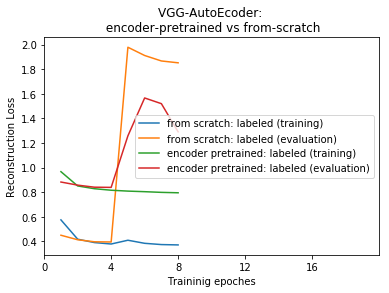

In [37]:
k1_to_m_dict={'en_pretrained':'encoder pretrained: ','fromscratch':'from scratch: '}
k2_to_m_dict={'unlabeled':'labeled (training)','labeled':'labeled (evaluation)'}

for k1 in loss_dict.keys():
    for k2 in loss_dict[k1].keys():
        plt.plot(range(1,1+len(loss_dict[k1][k2])),loss_dict[k1][k2],label=k1_to_m_dict[k1]+k2_to_m_dict[k2])#_to_m_dict[k])
plt.ylabel('Reconstruction Loss')
plt.xticks(np.arange(0, 20, 4.0))
plt.xlim([0,20])
plt.xlabel('Traininig epoches')
plt.title('VGG-AutoEcoder: \n encoder-pretrained vs from-scratch')
plt.legend()
plt.show()

["tensor(0.0013, device='cuda:0', dtype=torch.float64)\n"]


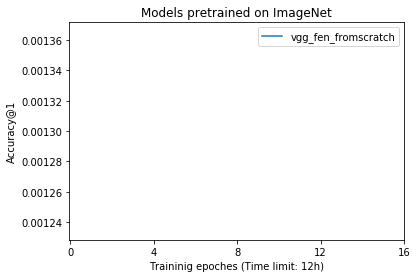

In [34]:
# 12h runing
# regex
#https://stackoverflow.com/questions/32680030/match-text-between-two-strings-with-regular-expression
# read filename in a directory
#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
# read txt line by line
#https://stackoverflow.com/questions/3277503/how-to-read-a-file-line-by-line-into-a-list

scorefilepath='/scratch/by783/DL_Final_models/'

net_score_dict={}

for scorefilename in os.listdir(scorefilepath):
    try:
        filenetname=re.search(r'190427_(.*?).pt_val_acc', scorefilename).group(1)
        #print(filenetname)
        with open(scorefilepath+scorefilename) as f:
            content = f.readlines()
            
        print(content)
        net_score_dict[filenetname]= [float(re.search(r"tensor\((.*?), device=\'cuda\:0\', dtype=torch.float64\)", s).group(1)) for s in content] 
        #tensor(0.4176, device='cuda:0', dtype=torch.float64)
    except:
        pass
    
#k_to_m_dict={'vgg':'vgg11_bn','squeezenet':'squeezenet1_0','resnet':'resnet18','alexnet':'alexnet','densenet':'densenet121','inception':'inception_v3'}

for k in net_score_dict.keys():
    plt.plot(range(len(net_score_dict[k])),net_score_dict[k],label=k)
plt.ylabel('Accuracy@1')
plt.xticks(np.arange(0, 20, 4.0))
plt.xlabel('Traininig epoches')
plt.title('Models pretrained on ImageNet')
plt.legend()
plt.show()

In [6]:
def image_loader(path, batch_size):
    transform = transforms.Compose(
        [
            #transforms.Resize(input_size),
            #transforms.CenterCrop(input_size),
            # use model fitted with the image size, so no need to resize
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            # https://pytorch.org/docs/stable/torchvision/transforms.html
            # [mean],[std] for different channels
        ]
    )
    sup_train_data = datasets.ImageFolder('{}/{}/train'.format(path, 'supervised'), transform=transform)
    sup_val_data = datasets.ImageFolder('{}/{}/val'.format(path, 'supervised'), transform=transform)
    unsup_data = datasets.ImageFolder('{}/{}/'.format(path, 'unsupervised'), transform=transform)
    # source code: https://github.com/pytorch/vision/blob/master/torchvision/datasets/folder.py
    # Main idea:
    data_loader_sup_train = torch.utils.data.DataLoader(
        sup_train_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0
    )
    data_loader_sup_val = torch.utils.data.DataLoader(
        sup_val_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0
    )
    data_loader_unsup = torch.utils.data.DataLoader(
        unsup_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0
    )

    print('sup_train_data.class_to_idx==sup_val_data.class_to_idx: ',
          sup_train_data.class_to_idx == sup_val_data.class_to_idx)

    return data_loader_sup_train, data_loader_sup_val, data_loader_unsup, sup_train_data.class_to_idx

In [7]:
# https://stackoverflow.com/questions/37837682/python-class-input-argument/37837766
# https://github.com/awentzonline/pytorch-cns/blob/master/examples/vggmse.py

class Model_Based_Autoencoder(torch.nn.Module):
    def __init__(self,model_name, pretrained):
        super(Model_Based_Autoencoder, self).__init__()
        if model_name!='vgg':
            sys.stdout.write('Dear, we only support vgg now...')
        
        self.encoder = models.vgg11_bn(pretrained=pretrained).features
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512,512,kernel_size=(2, 2), stride=(2, 2), padding=(0, 0)),#de-conv8
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(512,512,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),#de-conv7
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(512,512,kernel_size=(2, 2), stride=(2, 2), padding=(0, 0)),#de-conv6
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(512,256,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),#de-conv5
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(256,256,kernel_size=(2, 2), stride=(2, 2), padding=(0, 0)),#de-conv4
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(256,128,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),#de-conv3
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128,64,kernel_size=(2, 2), stride=(2, 2), padding=(0, 0)),#de-conv2
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64,3,kernel_size=(2, 2), stride=(2, 2), padding=(0, 0)),#de-conv1
            nn.BatchNorm2d(3),
            nn.Tanh()
        )
    
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [8]:
# vgg model website: https://github.com/pytorch/vision/blob/master/torchvision/models/vgg.py
class AE_Transfered_Network(torch.nn.Module):
    def __init__(self, classifier_type, autoencoder_model):
        super(AE_Transfered_Network, self).__init__()
        if classifier_type!='vgg':
            sys.stdout.write('Dear, we only support vgg now...')
        
        self.features = copy.deepcopy(autoencoder_model.encoder)
        self.avgpool=nn.AdaptiveAvgPool2d(output_size=(3, 3))
        self.classifier = nn.Sequential(
            nn.Linear(in_features=4608, out_features=4096, bias=True),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=4096, out_features=4096, bias=True),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=4096, out_features=1000, bias=True)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [9]:
model_folder_path = '/scratch/by783/DL_Final_models'
model_file_name='190425_raw_vggae_fromscratch_s.pt'
model_ae = torch.load(model_folder_path+'/'+model_file_name)
# Loading a model when it is not system class
# https://discuss.pytorch.org/t/error-loading-saved-model/8371/2

/home/by783/myenv/lib/python3.6/site-packages/torch/serialization.py:391: UserWarning: Couldn't retrieve source code for container of type Model_Based_Autoencoder. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "


In [10]:
# Extract model from DATAPARALLEL dtype
# https://discuss.pytorch.org/t/how-to-reach-model-attributes-wrapped-by-nn-dataparallel/1373/2
copy.deepcopy(model_ae.module.encoder)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU(inplace)
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU(inplace)
  (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (13): ReLU(inplace)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15)

In [11]:
model_ae.module.encoder[0].weight

Parameter containing:
tensor([[[[-5.2769e-01, -7.1528e-01, -4.6162e-01],
          [ 2.6017e-02, -5.9381e-02, -1.7727e-01],
          [ 5.1751e-01,  7.5852e-01,  5.2744e-01]],

         [[-7.9078e-01, -1.1198e+00, -7.6974e-01],
          [ 5.2802e-02, -7.2841e-03, -1.7325e-01],
          [ 7.5744e-01,  1.1558e+00,  7.7381e-01]],

         [[-3.4652e-01, -5.2292e-01, -3.1724e-01],
          [ 7.9745e-03,  2.0468e-02, -9.0747e-02],
          [ 3.0856e-01,  5.7886e-01,  3.5078e-01]]],


        [[[-9.8389e-41, -3.4771e-40,  4.8309e-40],
          [-6.7071e-40, -7.1748e-40,  1.9167e-40],
          [-6.2836e-40, -7.0683e-40,  1.2429e-40]],

         [[ 6.8724e-40,  7.0490e-40, -5.0493e-40],
          [ 6.8647e-40, -1.7394e-40,  7.4472e-40],
          [-9.7652e-41, -7.3578e-40,  4.3152e-40]],

         [[ 7.4656e-40, -6.7327e-41, -4.0485e-40],
          [-6.8419e-40, -7.4017e-40, -1.9377e-40],
          [ 1.5732e-40,  6.5903e-40, -3.2327e-40]]],


        [[[ 1.4466e-01,  2.0857e-01,  9.4098

In [12]:
model_ft = AE_Transfered_Network('vgg',model_ae.module)

In [13]:
model_ft

AE_Transfered_Network(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace)
    (14): MaxPool2d(kern

In [14]:
model_ft.features[0].weight

tensor([[[[-5.2769e-01, -7.1528e-01, -4.6162e-01],
          [ 2.6017e-02, -5.9381e-02, -1.7727e-01],
          [ 5.1751e-01,  7.5852e-01,  5.2744e-01]],

         [[-7.9078e-01, -1.1198e+00, -7.6974e-01],
          [ 5.2802e-02, -7.2841e-03, -1.7325e-01],
          [ 7.5744e-01,  1.1558e+00,  7.7381e-01]],

         [[-3.4652e-01, -5.2292e-01, -3.1724e-01],
          [ 7.9745e-03,  2.0468e-02, -9.0747e-02],
          [ 3.0856e-01,  5.7886e-01,  3.5078e-01]]],


        [[[-9.8389e-41, -3.4771e-40,  4.8309e-40],
          [-6.7071e-40, -7.1748e-40,  1.9167e-40],
          [-6.2836e-40, -7.0683e-40,  1.2429e-40]],

         [[ 6.8724e-40,  7.0490e-40, -5.0493e-40],
          [ 6.8647e-40, -1.7394e-40,  7.4472e-40],
          [-9.7652e-41, -7.3578e-40,  4.3152e-40]],

         [[ 7.4656e-40, -6.7327e-41, -4.0485e-40],
          [-6.8419e-40, -7.4017e-40, -1.9377e-40],
          [ 1.5732e-40,  6.5903e-40, -3.2327e-40]]],


        [[[ 1.4466e-01,  2.0857e-01,  9.4098e-02],
          [ 2.7

In [15]:
def set_parameter_pin_grad(model, pinning):
    if pinning:
        for param in model.parameters():
            param.requires_grad = False
    else:
        for param in model.parameters():
            param.requires_grad = True

In [16]:
feature_pinning=True

In [17]:
set_parameter_pin_grad(model_ft.features,feature_pinning)

In [18]:
model_ft.features[0].weight

tensor([[[[-5.2769e-01, -7.1528e-01, -4.6162e-01],
          [ 2.6017e-02, -5.9381e-02, -1.7727e-01],
          [ 5.1751e-01,  7.5852e-01,  5.2744e-01]],

         [[-7.9078e-01, -1.1198e+00, -7.6974e-01],
          [ 5.2802e-02, -7.2841e-03, -1.7325e-01],
          [ 7.5744e-01,  1.1558e+00,  7.7381e-01]],

         [[-3.4652e-01, -5.2292e-01, -3.1724e-01],
          [ 7.9745e-03,  2.0468e-02, -9.0747e-02],
          [ 3.0856e-01,  5.7886e-01,  3.5078e-01]]],


        [[[-9.8389e-41, -3.4771e-40,  4.8309e-40],
          [-6.7071e-40, -7.1748e-40,  1.9167e-40],
          [-6.2836e-40, -7.0683e-40,  1.2429e-40]],

         [[ 6.8724e-40,  7.0490e-40, -5.0493e-40],
          [ 6.8647e-40, -1.7394e-40,  7.4472e-40],
          [-9.7652e-41, -7.3578e-40,  4.3152e-40]],

         [[ 7.4656e-40, -6.7327e-41, -4.0485e-40],
          [-6.8419e-40, -7.4017e-40, -1.9377e-40],
          [ 1.5732e-40,  6.5903e-40, -3.2327e-40]]],


        [[[ 1.4466e-01,  2.0857e-01,  9.4098e-02],
          [ 2.7

In [19]:
model_vgg11_bn=models.vgg11_bn(pretrained=True)

In [20]:
#double check, our parameter is not transfer from system model
model_vgg11_bn.features[0].weight

Parameter containing:
tensor([[[[-5.9550e-01, -8.3957e-01, -5.1592e-01],
          [ 4.3290e-02, -5.4894e-02, -1.9865e-01],
          [ 6.0978e-01,  9.1177e-01,  6.1916e-01]],

         [[-9.0904e-01, -1.3191e+00, -8.8276e-01],
          [ 7.5378e-02,  6.8023e-03, -1.9233e-01],
          [ 8.9835e-01,  1.3841e+00,  9.1575e-01]],

         [[-3.8599e-01, -6.1602e-01, -3.4967e-01],
          [ 1.3486e-02,  3.0266e-02, -1.0543e-01],
          [ 3.4950e-01,  6.8686e-01,  3.9954e-01]]],


        [[[ 1.0105e-05, -5.7597e-07,  3.7357e-05],
          [ 2.3276e-05, -2.6341e-05,  2.4588e-05],
          [ 3.2592e-05, -8.7637e-06,  1.0022e-05]],

         [[-5.1987e-06, -1.5983e-05,  3.5566e-05],
          [ 1.8771e-05, -3.9012e-05,  2.3113e-05],
          [ 3.8826e-05, -8.0352e-06,  1.5741e-05]],

         [[-2.1435e-06, -9.3418e-06,  2.5209e-05],
          [ 1.3776e-05, -3.0619e-05,  1.3845e-05],
          [ 2.6642e-05, -9.2021e-06,  6.2266e-06]]],


        [[[ 1.8067e-01,  2.5138e-01,  1.2015

In [21]:
model_ft.features[4].weight.requires_grad

False

In [22]:
model_ft.classifier[3].weight.requires_grad

True

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

if torch.cuda.device_count() > 1:
    model_ft = nn.DataParallel(model_ft)

model_ft = model_ft.to(device)

In [24]:
model_ft

DataParallel(
  (module): AE_Transfered_Network(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU(inplace)
      (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): ReLU(inplace)
      (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [25]:
save_path='/scratch/by783/DL_Final_models/'+'190426_ATN_try.pt'
model_name = 'vgg'
num_epochs = 40
pin_encoder = True
loader_batch_size=512

In [26]:
num_classes = 1000
loader_image_path='/scratch/by783/DL_Final/ssl_data_96'

In [27]:
sys.stdout.write('Begin to load data...')

dataloaders={}

dataloaders['train'], dataloaders['val'], dataloaders['unlabeled'], class_to_idx_dict = image_loader(loader_image_path,loader_batch_size)

Begin to load data...sup_train_data.class_to_idx==sup_val_data.class_to_idx:  True


In [28]:
params_to_update = model_ft.parameters()
print("Params to learn:")
if feature_pinning:
    params_to_update = []
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            sys.stdout.write("\t{}".format(name))
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            sys.stdout.write("\t{}".format(name))

Params to learn:
	module.classifier.0.weight	module.classifier.0.bias	module.classifier.3.weight	module.classifier.3.bias	module.classifier.6.weight	module.classifier.6.bias

In [29]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, is_inception=False):
    since = time.time()

    val_acc_history = []

    #best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
            # 切换phase重置loss
            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.
                    if is_inception and phase == 'train':
                        # From https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            sys.stdout.write('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
            sys.stdout.write('training time: {:.0f}s'.format( time.time() - since ))

            # deep copy the model
            if phase == 'val':
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    #best_model_wts = copy.deepcopy(model.state_dict())
                    with open(save_path, 'wb') as f:
                        torch.save(model, f)
                #else:
                    #lr/=4
                # 只有phase为val的acc loss才被加入 val_acc
                val_acc_history.append(epoch_acc)
                with open(save_path+'_val_acc', 'w') as f:
                    for item in val_acc_history:
                        f.write("%s\n" % item)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [30]:
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()



In [31]:
sys.stdout.write('Begin to train...')
# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=(model_name=="inception"))


Begin to train...Epoch 0/39
----------


KeyboardInterrupt: 

Begin to train...Epoch 0/39
----------
train Loss: 6.9121 Acc: 0.0010training time: 1624s